In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import os, sys

In [ ]:
os.getcwd()
rpath = os.path.abspath('../')
if rpath not in sys.path:
    sys.path.insert(0,rpath)

In [3]:
# Construct the file path
file_path = os.path.join(rpath, 'data', 'creditcard.csv')

credit_data = pd.read_csv(file_path)
credit_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# prompt: print unique class and its amout

import pandas as pd
# Assuming you have the credit_data DataFrame loaded as shown in your code.

# Assuming 'Class' is the column you want to analyze
unique_classes = credit_data['Class'].unique()
class_counts = credit_data['Class'].value_counts()

print("Unique classes and their counts:")
for class_value in unique_classes:
  print(f"Class: {class_value}, Count: {class_counts[class_value]}")

Unique classes and their counts:
Class: 0, Count: 284315
Class: 1, Count: 492


In [5]:
# prompt: split to 80/20 ratio

from sklearn.model_selection import train_test_split

X = credit_data.drop(['Time', 'Class'], axis=1)
y = credit_data['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (227845, 29)
X_test shape: (56962, 29)
y_train shape: (227845,)
y_test shape: (56962,)


In [9]:
import mlflow
import mlflow.sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import shap
from lime import lime_tabular
import tensorflow as tf
from tensorflow.keras import layers, models
import pandas as pd
import numpy as np

# Function to log metrics and explainability
def log_metrics_and_explainability(model, model_name, X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name=model_name):
        # Train the model
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        # Log parameters (if any)
        if hasattr(model, 'get_params'):
            mlflow.log_params(model.get_params())

        # Log metrics
        accuracy = accuracy_score(y_test, y_pred)
        mlflow.log_metric("accuracy", accuracy)

        # Log model
        mlflow.sklearn.log_model(model, model_name)

        print(f"{model_name} Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        print(f"{model_name} Model saved to MLflow")



In [10]:
# Logistic Regression
log_metrics_and_explainability(LogisticRegression(), "LogisticRegression", X_train, X_test, y_train, y_test)

# Decision Tree
log_metrics_and_explainability(DecisionTreeClassifier(), "DecisionTree", X_train, X_test, y_train, y_test)

# Random Forest
log_metrics_and_explainability(RandomForestClassifier(n_estimators=100, random_state=42), "RandomForest", X_train, X_test, y_train, y_test)

# Gradient Boosting
log_metrics_and_explainability(GradientBoostingClassifier(), "GradientBoosting", X_train, X_test, y_train, y_test)

# Multi-Layer Perceptron (MLP)
log_metrics_and_explainability(MLPClassifier(), "MLP", X_train, X_test, y_train, y_test)

2024/10/22 11:20:37 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


LogisticRegression Model accuracy: 0.9990519995786665
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.84      0.55      0.67        98

    accuracy                           1.00     56962
   macro avg       0.92      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962

LogisticRegression Model saved to MLflow


2024/10/22 11:21:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


DecisionTree Model accuracy: 0.9992626663389628
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.81      0.79        98

    accuracy                           1.00     56962
   macro avg       0.89      0.90      0.89     56962
weighted avg       1.00      1.00      1.00     56962

DecisionTree Model saved to MLflow


2024/10/22 11:26:15 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


RandomForest Model accuracy: 0.9995611109160493
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.77      0.86        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962

RandomForest Model saved to MLflow


2024/10/22 11:33:59 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


GradientBoosting Model accuracy: 0.9989466661985184
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.74      0.60      0.66        98

    accuracy                           1.00     56962
   macro avg       0.87      0.80      0.83     56962
weighted avg       1.00      1.00      1.00     56962

GradientBoosting Model saved to MLflow


2024/10/22 11:34:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


MLP Model accuracy: 0.9991924440855307
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.59      0.72        98

    accuracy                           1.00     56962
   macro avg       0.95      0.80      0.86     56962
weighted avg       1.00      1.00      1.00     56962

MLP Model saved to MLflow


**CNN**

In [37]:
# CNN Example
def create_cnn_model(input_shape):
    model = models.Sequential([
        layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=input_shape),
        layers.MaxPooling1D(pool_size=2),
        layers.Flatten(),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# CNN Training
def log_cnn_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="CNN"):
        cnn_model = create_cnn_model((X_train.shape[1], 1))
        cnn_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = cnn_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = cnn_model.predict(X_test)
        y_pred = (y_pred > 0.5).astype(int)
        print(f"CNN Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        cnn_model.save("cnn_model.h5")
        mlflow.log_artifact("cnn_model.h5")

log_cnn_model(X_train.values, X_test.values, y_train.values, y_test.values)

# Similar implementation can be done for RNN and LSTM using TensorFlow/Keras.

# End of neural models


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9994 - loss: 0.0039
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step


CNN Model accuracy: 0.9993504285812378
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.88      0.72      0.79        98

    accuracy                           1.00     56962
   macro avg       0.94      0.86      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**RNN**

In [38]:
# RNN Example
def create_rnn_model(input_shape):
    model = models.Sequential([
        layers.SimpleRNN(64, input_shape=input_shape, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# RNN Training
def log_rnn_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="RNN"):
        rnn_model = create_rnn_model((X_train.shape[1], 1))
        rnn_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = rnn_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = rnn_model.predict(np.expand_dims(X_test, axis=2))
        y_pred = (y_pred > 0.5).astype(int)
        print(f"RNN Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        rnn_model.save("rnn_model.h5")
        mlflow.log_artifact("rnn_model.h5")

log_rnn_model(X_train.values, X_test.values, y_train.values, y_test.values)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9984 - loss: 0.0074
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step


RNN Model accuracy: 0.9983848929405212
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.71      0.10      0.18        98

    accuracy                           1.00     56962
   macro avg       0.86      0.55      0.59     56962
weighted avg       1.00      1.00      1.00     56962



**LSTM**

In [42]:
# LSTM Example
def create_lstm_model(input_shape):
    model = models.Sequential([
        layers.LSTM(64, input_shape=input_shape, activation='relu'),
        layers.Dense(100, activation='relu'),
        layers.Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# LSTM Training
def log_lstm_model(X_train, X_test, y_train, y_test):
    with mlflow.start_run(run_name="LSTM"):
        lstm_model = create_lstm_model((X_train.shape[1], 1))
        lstm_model.fit(np.expand_dims(X_train, axis=2), y_train, epochs=10, batch_size=32, verbose=0)
        loss, accuracy = lstm_model.evaluate(np.expand_dims(X_test, axis=2), y_test)
        mlflow.log_metric("accuracy", accuracy)
        y_pred = lstm_model.predict(np.expand_dims(X_test, axis=2))
        y_pred = (y_pred > 0.5).astype(int)
        print(f"LSTM Model accuracy: {accuracy}")
        print(classification_report(y_test, y_pred))
        lstm_model.save("lstm_model.h5")
        mlflow.log_artifact("lstm_model.h5")

log_lstm_model(X_train.values, X_test.values, y_train.values, y_test.values)


1781/1781 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9994 - loss: 0.0050
1781/1781 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step


LSTM Model accuracy: 0.9993680119514465
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.74      0.80        98

    accuracy                           1.00     56962
   macro avg       0.93      0.87      0.90     56962
weighted avg       1.00      1.00      1.00     56962



**Model Explaiability**
* Random Forest: the best performed model
> - all other model performed well for class 0 but poor for class 1 due to class imbalance in the dataset. However, random forest performed better regardless of the class imbalance.

In [10]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))

Random Forest Performance:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.99      0.79      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.89      0.94     56962
weighted avg       1.00      1.00      1.00     56962



In [21]:
import shap

# Create a SHAP explainer for your model
explainer = shap.TreeExplainer(rf)  # for tree-based models

In [12]:
shap_values = explainer.shap_values(X_test)

In [39]:
X_test.shape, shap_values.shape

((56962, 29), (56962, 29, 2))

In [13]:
# Extract SHAP values for class 1 (fraud)
shap_values_class_0 = shap_values[:, :, 0]  # This will give you a shape of (56962, 29)
shap_values_class_1 = shap_values[:, :, 1]  # This will give you a shape of (56962, 29)
shap_values_class_1.shape

(56962, 29)

**Beeswarm plot**

- Y-axis indicates the feature names in order of importance from top to bottom.
- X-axis represents the SHAP value, which indicates the degree of change in log odds.
- The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.

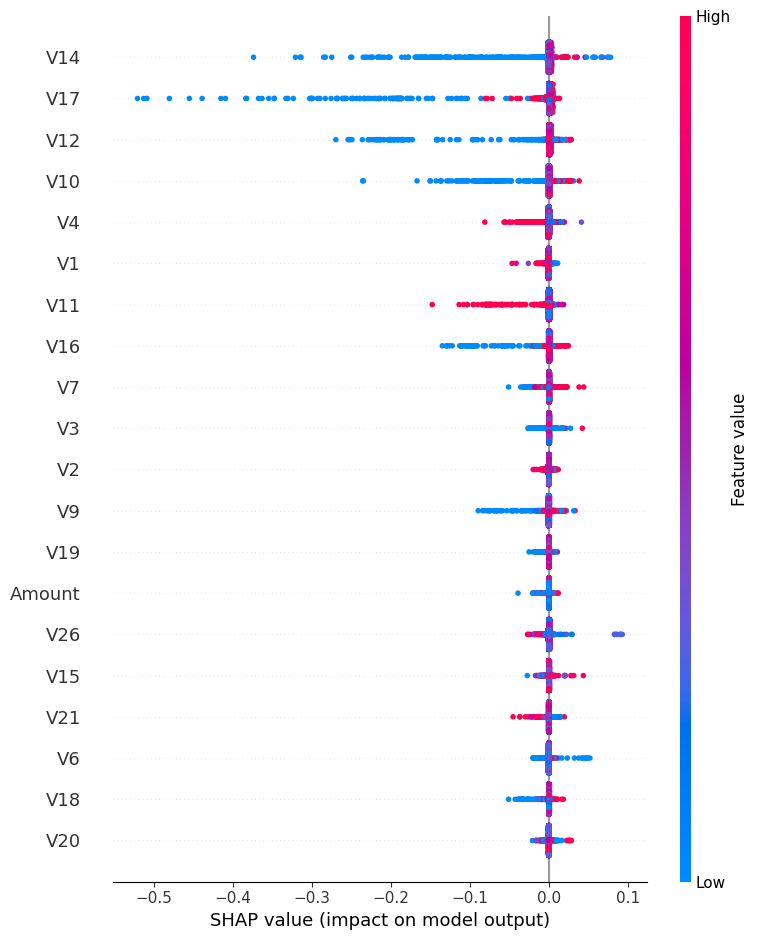

In [14]:
shap.summary_plot(shap_values_class_0, X_test)

* V17 feature is mostly low with negative shap value indicating that lower V17 feature counts tend to negatively affect the output class 0(non fraudulent transaction).

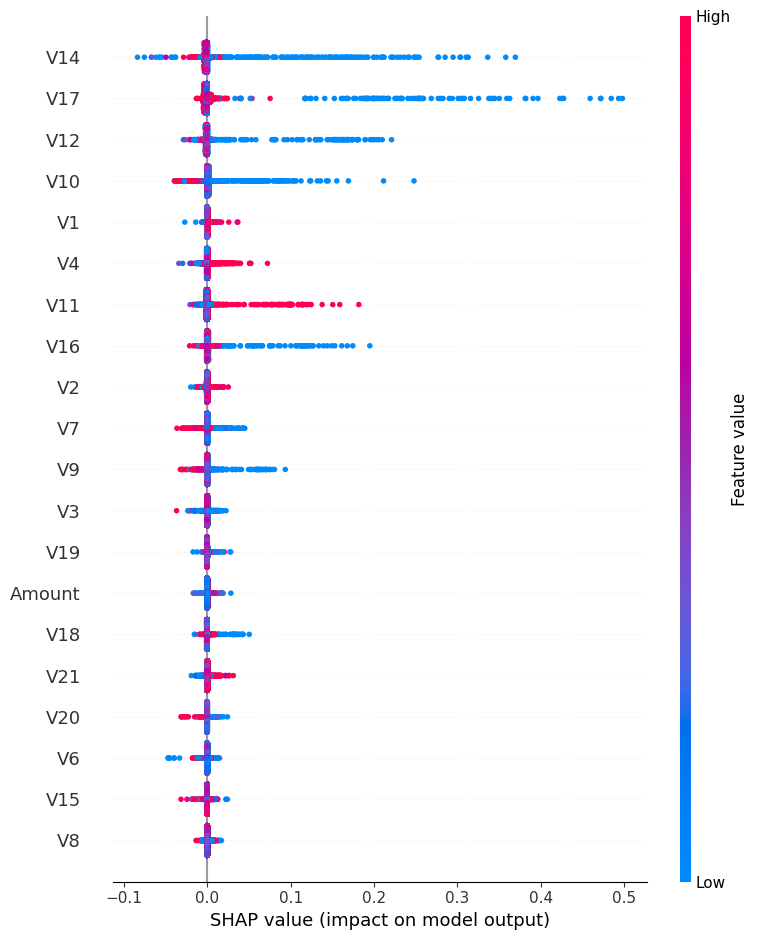

In [41]:
# Summary Plot
shap.summary_plot(shap_values_class_1, X_test)

* V17 feature is mostly low with negative shap value indicating that lower V17 feature counts tend to positively affect the output class 1(fraudulent transaction).

**Forceplot**

We can  see that values presented under feature of V 12, 17, 14, 16,10, 9, 11 and 18have contributed to positively to class 0 (non fraudulent transaction).

In [22]:
shap.initjs()
# Force Plot for a single prediction (e.g., 1st sample)
shap.force_plot(explainer.expected_value[1], shap_values_class_0[0], X_test.iloc[0])

In [15]:
shap.initjs()
# Force Plot for a single prediction (e.g., 1st sample)
shap.force_plot(explainer.expected_value[1], shap_values_class_1[0], X_test.iloc[0])

- We can  see that values presented under feature of V 12, 17, 14, 16,10, 9, 11 and 18have contributed to negatively to class 1 (fraudulent transaction).

* It illustrates the contributions of each feature to the final prediction. Positive contributions (to the right side of the plot) increase the output value, while negative contributions (to the left side) decrease it.
* The length of each feature’s arrow indicates the magnitude of its impact on the prediction. Longer arrows suggest higher influence, showcasing which features significantly affect the model’s decision for that instance.
* The distance from the base value (vertical dashed line) shows how much the model’s output for this instance differs from the average prediction (base value: 0.001717) for the dataset. This demonstrates how the combined effects of features shift the prediction for this specific data point.

**Dependence Plot**

* A dependence plot is a type of scatter plot that displays how a model's predictions are affected by a specific feature i.e. Amount. On average, Amount have a mostly positive effect on the model.

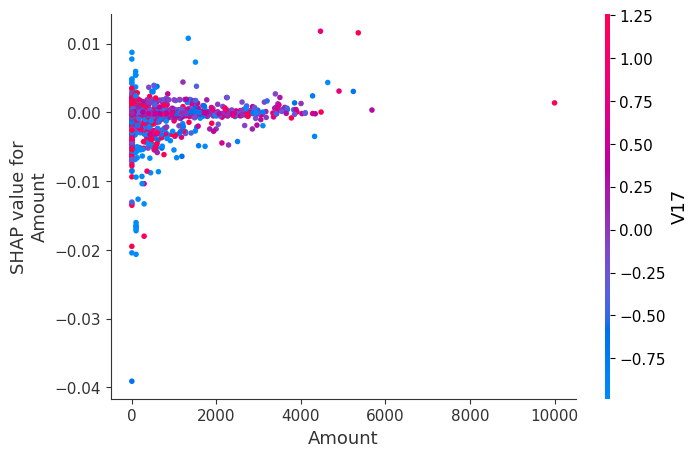

In [17]:
# Dependence Plot (for the feature 'purchase_value')
shap.dependence_plot("Amount", shap_values_class_0, X_test)

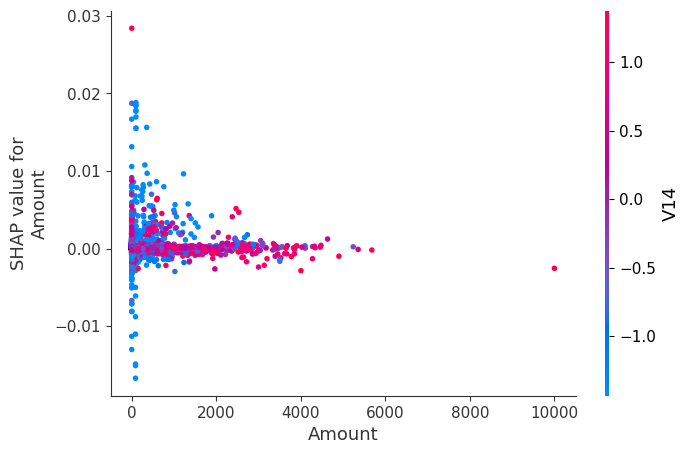

In [33]:
# Dependence Plot (for the feature 'purchase_value')
shap.dependence_plot("Amount", shap_values_class_1, X_test)

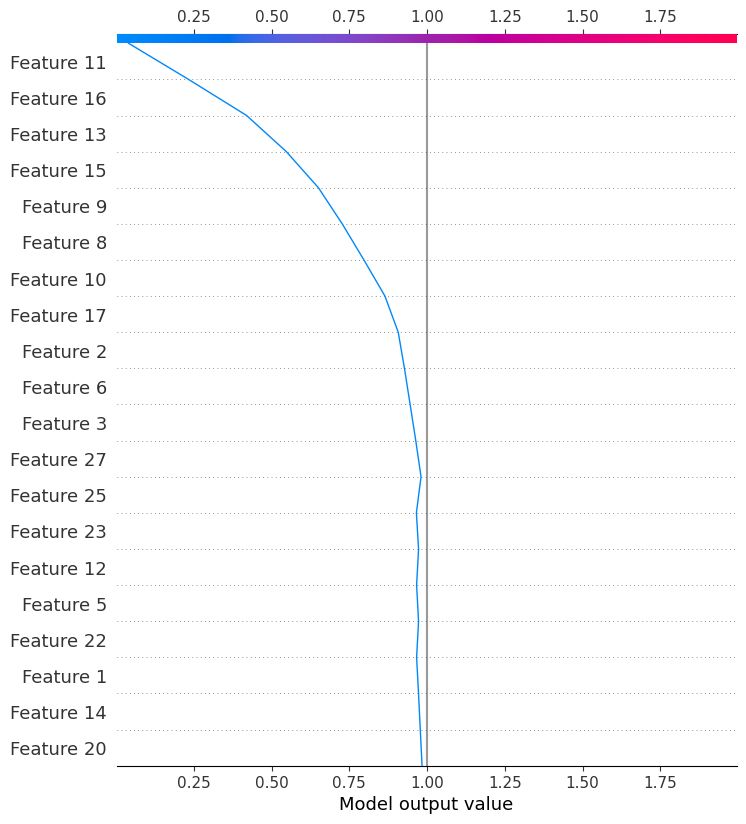

In [26]:
shap.decision_plot(explainer.expected_value[0], shap_values_class_0[0])

**LIME**

*  LIME focuses on explaining individual predictions rather than providing global insights into the entire model.

In [18]:
# Initialize the LimeTabularExplainer
explainer = lime_tabular.LimeTabularExplainer(X_train.values,
                                              feature_names=X_train.columns,
                                              class_names=['Non-Fraud', 'Fraud'],
                                              mode='classification')


In [36]:
# Choose a test instance to explain (for example, the first instance)
instance_to_explain = X_test.values[0]

# Explain the prediction for the chosen instance
exp = explainer.explain_instance(instance_to_explain, rf.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)


In [19]:
# Choose a test instance to explain (for example, the first instance)
instance_to_explain = X_test.values[1]

# Explain the prediction for the chosen instance
exp = explainer.explain_instance(instance_to_explain, rf.predict_proba)

# Display the explanation
exp.show_in_notebook(show_table=True, show_all=False)
